In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sea

## Import data into Python environment.

In [2]:
comcast_data = pd.read_csv('./Dataset/Comcast_telecom_complaints_data.csv')

In [3]:
comcast_data.shape

(2224, 11)

In [4]:
comcast_data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [5]:
comcast_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [6]:
import datetime as dt
import calendar
comcast_data['Date'] = pd.to_datetime(comcast_data['Date'])
comcast_data['Month'] = comcast_data['Date'].dt.month
comcast_data['Month'] = comcast_data['Month'].apply(lambda x: calendar.month_abbr[x])
comcast_data.drop('Date_month_year', axis=1, inplace=True)

In [7]:
comcast_data['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [8]:
comcast_data['Status2'] = comcast_data['Status']

In [10]:
comcast_data.head()

,Ticket #,Customer Complaint,Date,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,Status2
0,250635,Comcast Cable Internet Speeds,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Apr,Closed
1,223441,Payment disappear - service got disconnected,2015-04-08,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Apr,Closed
2,242732,Speed and Service,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Apr,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,May,Open
4,307175,Comcast not working and no service to boot,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May,Solved


## Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as 	 and Closed & Solved is to be categorized as Closed.

In [11]:
replace_values = {'Open' : 'Open', 'Pending' : 'Open', 'Closed' : 'Closed' , 'Solved':'Closed'}  

In [12]:
comcast_data = comcast_data.replace({'Status2':replace_values})

## Provide a table with the frequency of complaint types.

In [31]:
complaint_type_frequency = comcast_data['Customer Complaint']
complaint_type_frequency.value_counts()[:10]

Comcast                     83
Comcast Internet            18
Comcast Data Cap            17
comcast                     13
Comcast Billing             11
Comcast Data Caps           11
Data Caps                   11
Unfair Billing Practices     9
Comcast internet             8
Comcast data cap             8
Name: Customer Complaint, dtype: int64

## Which complaint types are maximum

In [37]:
complaint_type_frequency.value_counts().max()

83

### Comcast has the highest frequency count :83

## Provide the trend chart for the number of complaints at monthly and daily granularity levels.

### Daily

No handles with labels found to put in legend.


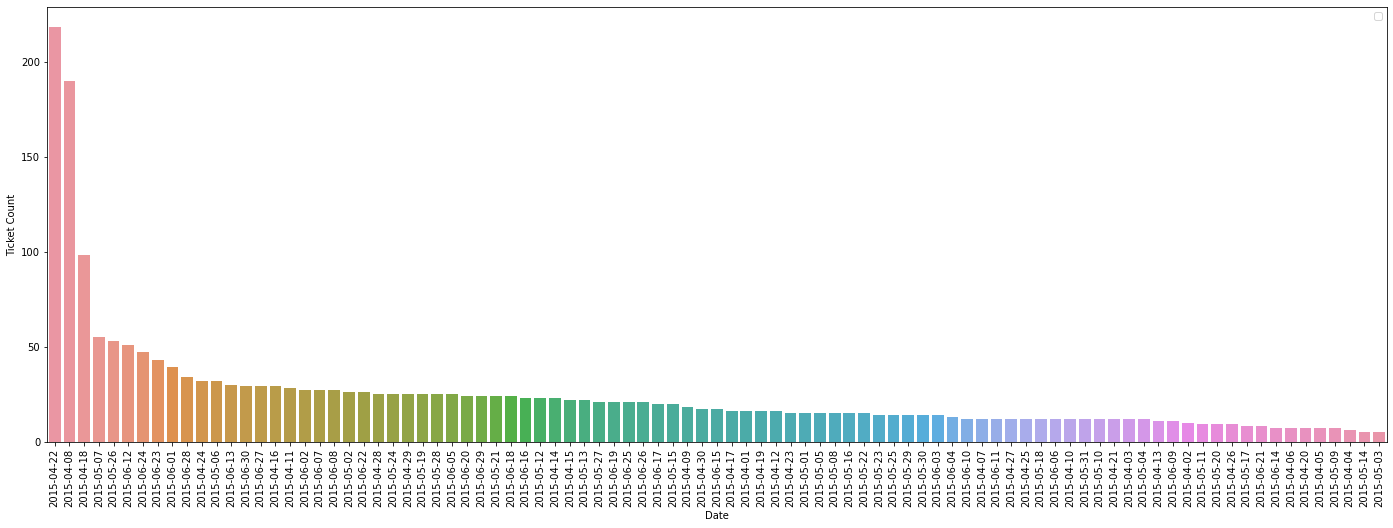

In [14]:
plt.figure(figsize=(24,8))

sea.barplot(x=comcast_data['Date'].dt.date.unique(),y=comcast_data['Date'].value_counts())
plt.xticks(rotation=90)
plt.ylabel('Ticket Count')
plt.xlabel('Date')
plt.legend()

### Monthly

Text(0.5, 0, 'Month')

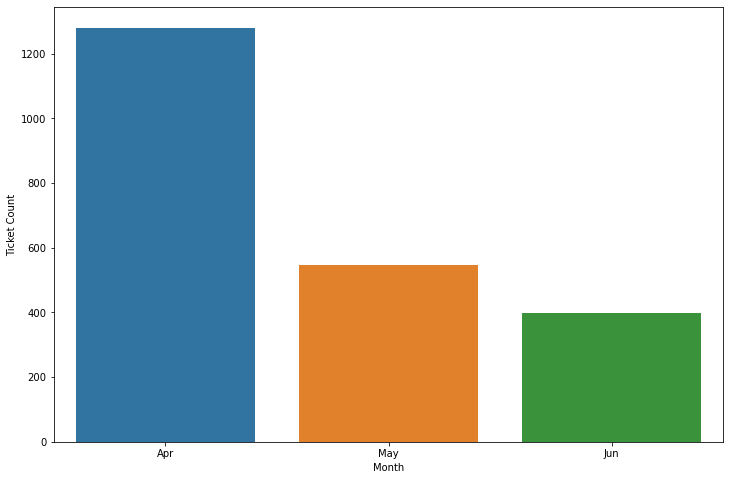

In [15]:
plt.figure(figsize=(12,8))

sea.barplot(x=comcast_data['Month'].unique(),y=comcast_data['Month'].value_counts())

plt.ylabel('Ticket Count')
plt.xlabel('Month')

## Provide state wise status of complaints in a stacked bar chart.

In [19]:
state_status= comcast_data.groupby(['Status','State'])['Status'].count()
state_status=state_status.unstack(level=1)

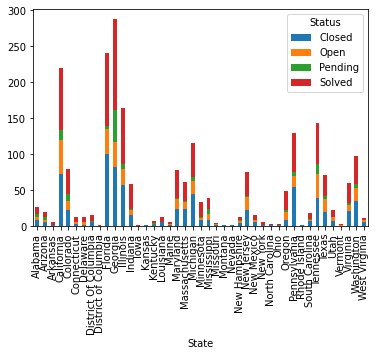

In [20]:
state_status.T.plot(kind='bar', stacked=True)

In [21]:
state_status= comcast_data.groupby(['Status2','State'])['Status2'].count()
state_status=state_status.unstack(level=1)

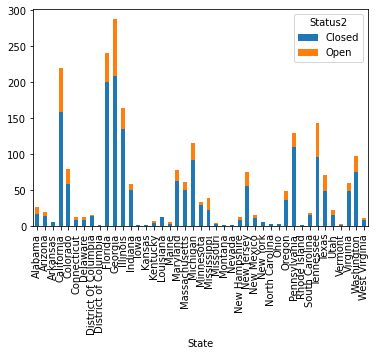

In [22]:
state_status.T.plot(kind='bar', stacked=True)

In [32]:
state = pd.DataFrame({'Count':comcast_data['State'].value_counts()})

## Which state has the maximum complaints

In [47]:
state[state['Count']==state['Count'].max()]

,Count
Georgia,288


## Which state has the highest percentage of unresolved complaints

In [91]:
state_status=comcast_data.groupby(["State","Status2"]).size().unstack().fillna(0)

In [98]:
state_status.head()

Status2,Closed,Open,Open%
State,,,
Alabama,17.0,9.0,34.615385
Arizona,14.0,6.0,30.000000
Arkansas,6.0,0.0,0.000000
California,159.0,61.0,27.727273
Colorado,58.0,22.0,27.500000


In [93]:
state_status.columns

Index(['Closed', 'Open'], dtype='object', name='Status2')

In [94]:
state_status['Open%'] = (state_status['Open']/(state_status['Open']+state_status['Closed']))*100

In [97]:
state_status.sort_values('Open%',ascending=False).head()

Status2,Closed,Open,Open%
State,,,
Kansas,1.0,1.0,50.000000
Kentucky,4.0,3.0,42.857143
Mississippi,23.0,16.0,41.025641
Maine,3.0,2.0,40.000000
Alabama,17.0,9.0,34.615385


## Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls

In [99]:
received_status=comcast_data.groupby(["Received Via","Status2"]).size().unstack().fillna(0)

In [101]:
received_status['Closed%'] = (received_status['Closed']/(received_status['Open']+received_status['Closed']))*100

In [102]:
received_status

Status2,Closed,Open,Closed%
Received Via,,,
Customer Care Call,864,255,77.211796
Internet,843,262,76.289593


In [105]:
Total_Tickets_closed= (received_status['Closed'].sum()/(received_status['Closed'].sum()+received_status['Open'].sum()))*100

In [106]:
Total_Tickets_closed

76.75359712230215